In [1]:
import seaborn as sns
import numpy 
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential 
from keras.layers import Dense 
from scikeras.wrappers import KerasRegressor #KerasClassifier # Permet d'utiliser les modèles de Keras avec Scikit-Learn
from sklearn.model_selection import train_test_split 
import pandas as pd  
import matplotlib.pyplot as plt 
from keras.models import Sequential 
from keras.layers import Dense 
from sklearn.metrics import mean_absolute_error 
import seaborn as sns
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn import metrics
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [2]:
#charger la dataset 
df = pd.read_csv("insurance.csv")
print(df.shape)

(1338, 7)


In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
print(df['sex'].value_counts()) 

male      676
female    662
Name: sex, dtype: int64


In [6]:
print(df['region'].value_counts()) 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [9]:
df.loc[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [10]:
df.drop(581)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
df['sex'].replace(['female','male'], [0.0,1.0], inplace = True)
df['smoker'].replace(['no','yes'], [0.0,1.0], inplace = True)
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,southwest,16884.92400
1,18,1.0,33.770,1,0.0,southeast,1725.55230
2,28,1.0,33.000,3,0.0,southeast,4449.46200
3,33,1.0,22.705,0,0.0,northwest,21984.47061
4,32,1.0,28.880,0,0.0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,northwest,10600.54830
1334,18,0.0,31.920,0,0.0,northeast,2205.98080
1335,18,0.0,36.850,0,0.0,southeast,1629.83350
1336,21,0.0,25.800,0,0.0,southwest,2007.94500


In [12]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

encoder_df = pd.DataFrame(encoder.fit_transform(df[['region']]).toarray())

final_df = df.join(encoder_df)
final_df.drop('region',1,inplace=True)
final_df.rename(columns={0: 'northeast', 
                           1: 'northwest',
                            2: 'southeast',
                                3: 'southwest',}, inplace=True)
#final_df = final_df[['age', 'sex', 'bmi','children','smoker','northeast','northwest','southeast','southwest','charges']]

C:\Users\Mohcine\AppData\Local\Temp/ipykernel_15220/2113127113.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  final_df.drop('region',1,inplace=True)


In [13]:
df = final_df[['age', 'sex', 'bmi','children','smoker','northeast','northwest','southeast','southwest','charges']]
df

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0.0,27.900,0,1.0,0.0,0.0,0.0,1.0,16884.92400
1,18,1.0,33.770,1,0.0,0.0,0.0,1.0,0.0,1725.55230
2,28,1.0,33.000,3,0.0,0.0,0.0,1.0,0.0,4449.46200
3,33,1.0,22.705,0,0.0,0.0,1.0,0.0,0.0,21984.47061
4,32,1.0,28.880,0,0.0,0.0,1.0,0.0,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,0.0,1.0,0.0,0.0,10600.54830
1334,18,0.0,31.920,0,0.0,1.0,0.0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,0.0,0.0,1.0,0.0,1629.83350
1336,21,0.0,25.800,0,0.0,0.0,0.0,0.0,1.0,2007.94500


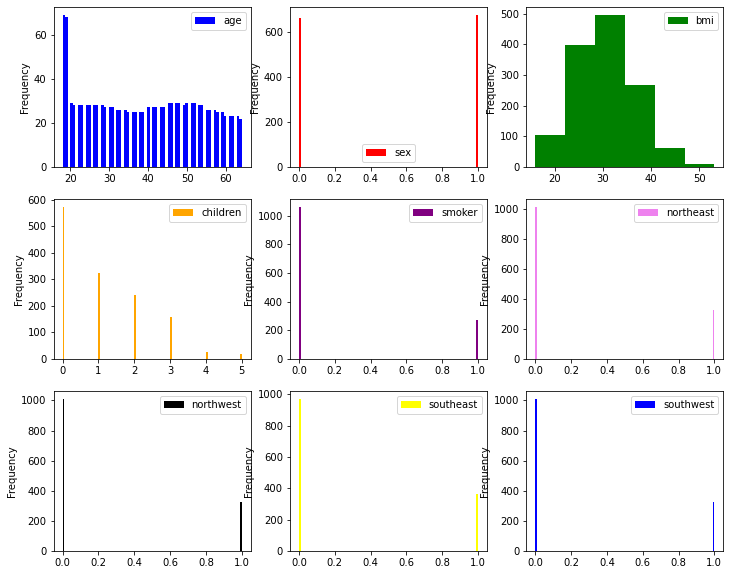

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
df.plot(kind="hist", y="age", bins=70, color="b", ax=axes[0][0])
df.plot(kind="hist", y="sex", bins=100, color="r", ax=axes[0][1])
df.plot(kind="hist", y="bmi", bins=6, color="g", ax=axes[0][2])
df.plot(kind="hist", y="children", bins=100, color="orange", ax=axes[1][0])
df.plot(kind="hist", y="smoker", bins=100, color="purple", ax=axes[1][1])
df.plot(kind="hist", y="northeast", bins=100, color="violet", ax=axes[1][2])
df.plot(kind="hist", y="northwest", bins=100, color="black", ax=axes[2][0])
df.plot(kind="hist", y="southeast", bins=100, color="yellow", ax=axes[2][1])
df.plot(kind="hist", y="southwest", bins=100, color="b", ax=axes[2][2])
plt.show()

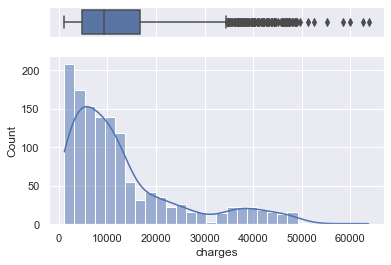

In [15]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='charges', ax=ax_box)
sns.histplot(data=df, x="charges", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

In [16]:
df['charges'] = df['charges'].apply(np.log)

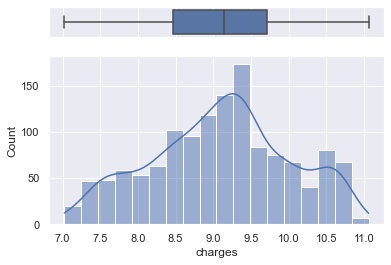

In [17]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(data=df,x='charges', ax=ax_box)
sns.histplot(data=df, x="charges", ax=ax_hist,kde=True)
ax_box.set(xlabel='')
plt.show()

<AxesSubplot:>

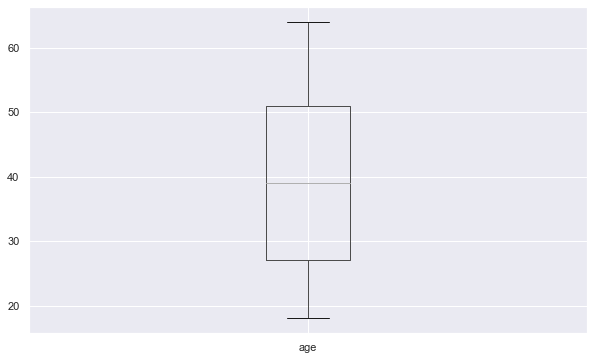

In [18]:
df.boxplot('age',figsize=(10,6))

<AxesSubplot:>

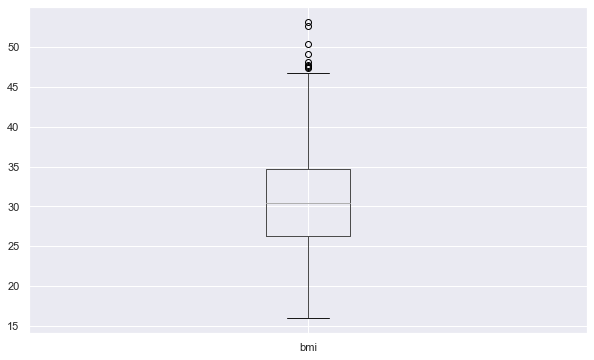

In [19]:
df.boxplot('bmi',figsize=(10,6))

In [20]:
data_box_plot = df[['age', 'bmi']]

In [21]:
# OUTLIERS DETECTION
somme = 0
for i in data_box_plot:
    Q1 = np.quantile(df[str(i)], .25)
    Q3 = np.quantile(df[str(i)], .75)
    Q = Q3-Q1
    temp = df[df[str(i)] > Q1-(1.5 * Q)]
    temp = temp[df[str(i)] < Q3+ (1.5 * Q)]
    print('Percentage of outliers in the column ',str(i), 'is ', ((df.shape[0] - temp.shape[0])/df.shape[0]) * 100,'%\n')
    print(df.shape[0]-temp.shape[0])
    print('\n -----------------------------------------------------\n')
    somme += ((df.shape[0] - temp.shape[0])/df.shape[0]) * 100
print('Percentage of outliers in all column is ', somme)

Percentage of outliers in the column  age is  0.0 %

0

 -----------------------------------------------------

Percentage of outliers in the column  bmi is  0.672645739910314 %

9

 -----------------------------------------------------

Percentage of outliers in all column is  0.672645739910314


In [22]:
Q3 = df['bmi'].quantile(0.75)
Q1 = df['bmi'].quantile(0.25)
IQR = Q3-Q1
upper = Q3+(1.5*IQR)
lower = Q1-(1.5*IQR)
df = df[(df['bmi']>lower) & (df['bmi']<upper)]

In [23]:
df.shape

(1329, 10)

In [24]:
df

,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,19,0.0,27.900,0,1.0,0.0,0.0,0.0,1.0,9.734176
1,18,1.0,33.770,1,0.0,0.0,0.0,1.0,0.0,7.453302
2,28,1.0,33.000,3,0.0,0.0,0.0,1.0,0.0,8.400538
3,33,1.0,22.705,0,0.0,0.0,1.0,0.0,0.0,9.998092
4,32,1.0,28.880,0,0.0,0.0,1.0,0.0,0.0,8.260197
...,...,...,...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,0.0,1.0,0.0,0.0,9.268661
1334,18,0.0,31.920,0,0.0,1.0,0.0,0.0,0.0,7.698927
1335,18,0.0,36.850,0,0.0,0.0,0.0,1.0,0.0,7.396233
1336,21,0.0,25.800,0,0.0,0.0,0.0,0.0,1.0,7.604867


In [25]:
scaler = MinMaxScaler()
data_to_normalize = df[['age','bmi' ,'charges']]
scaler.fit(data_to_normalize)
df[['age','bmi','charges']] = scaler.transform(data_to_normalize)
df

C:\Users\Mohcine\anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


,age,sex,bmi,children,smoker,northeast,northwest,southeast,southwest,charges
0,0.021739,0.0,0.387788,0,1.0,0.0,0.0,0.0,1.0,0.674206
1,0.000000,1.0,0.578435,1,0.0,0.0,0.0,1.0,0.0,0.107057
2,0.217391,1.0,0.553426,3,0.0,0.0,0.0,1.0,0.0,0.342591
3,0.326087,1.0,0.219065,0,0.0,0.0,1.0,0.0,0.0,0.739829
4,0.304348,1.0,0.419617,0,0.0,0.0,1.0,0.0,0.0,0.307695
...,...,...,...,...,...,...,...,...,...,...
1333,0.695652,1.0,0.487496,3,0.0,0.0,1.0,0.0,0.0,0.558454
1334,0.000000,0.0,0.518350,0,0.0,1.0,0.0,0.0,0.0,0.168133
1335,0.000000,0.0,0.678467,0,0.0,0.0,0.0,1.0,0.0,0.092867
1336,0.065217,0.0,0.319584,0,0.0,0.0,0.0,0.0,1.0,0.144744


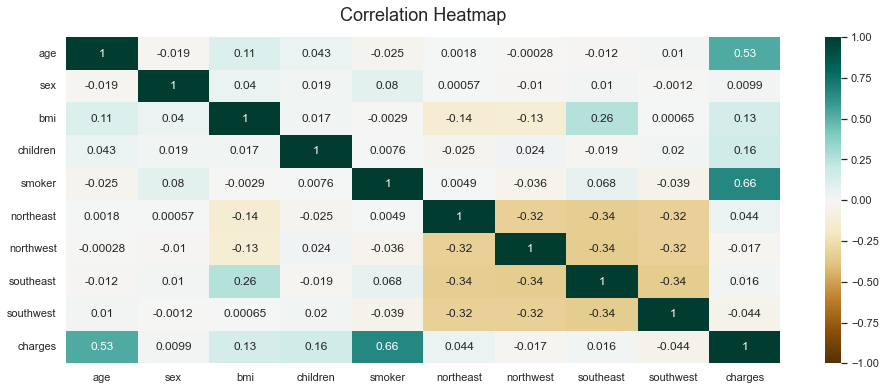

In [26]:
plt.figure(figsize=(16,6))
heatmap = sns.heatmap(df.corr(), vmin=-1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize' :18}, pad=16);

In [27]:
df = df.drop(['sex','northeast', 'northwest', 'southeast', 'southwest'], axis = 1)

In [78]:
X, y =df.values[:,:-1], df.values[:,-1] 
#train-test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33)

In [79]:
#determiner le nombre de caractéristique d'entrée
n_features = X.shape[1] 
#définire le model 
model = Sequential() 
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,))) 
model.add(Dense(1))
#compiler le model 
model.compile(optimizer='adam', loss='mse') 
history = model.fit(X_train, y_train, epochs = 100, batch_size = 8, verbose = 0, 
validation_data=(X_test, y_test)) 
#resultat
yhat = model.predict(X_test) 
#évaluer les predictions 
score = mean_absolute_error(y_test, yhat) 
print('MAE : %.3f' %score) 

MAE : 0.056


In [80]:
print("Mean Absolute Error (MAE) : " ,metrics.mean_absolute_error(y_test, yhat))
print("Mean Squared Error (MSE) : " ,metrics.mean_squared_error(y_test, yhat))
print("Root Mean Squared Error (RMSE) : " ,np.sqrt(metrics.mean_squared_error(y_test, yhat)))
print('R2 : %.3f' %metrics.r2_score(y_test, yhat))

Mean Absolute Error (MAE) :  0.056372038797022794
Mean Squared Error (MSE) :  0.008292357934445556
Root Mean Squared Error (RMSE) :  0.0910623848493194
R2 : 0.846


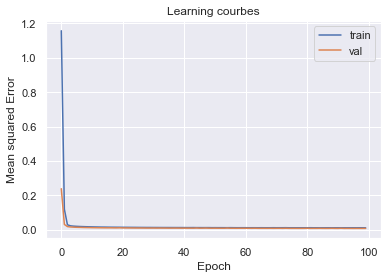

In [81]:
plt.title('Learning courbes') 
plt.xlabel('Epoch') 
plt.ylabel('Mean squared Error') 
plt.plot(history.history['loss'], label = 'train') 
plt.plot(history.history['val_loss'], label = 'val') 
plt.legend() 
plt.show()

In [82]:
#préparer cross validation 
from sklearn.model_selection import KFold , cross_val_score 
import numpy as np 
X,y = df.values[:,:-1], df.values[:,-1] 
#kfold 
kfold = KFold(10) 
#énumérer les splits 
maes = list() 
mses = list() 
rmses = list()
r2s = list()

for train_ix, test_ix, in kfold.split(X,y): 
     X_train, X_test, y_train, y_test = X[train_ix], X[test_ix], y[train_ix], y[test_ix] 
     #determiner le nombre d'input features 
     n_features = X.shape[1] 
     #define the model 
     model = Sequential() 
     model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,))) 
     model.add(Dense(1)) 
     #compile the model 
     model.compile(optimizer='adam', loss='mse') 
     #fit the model 
     model.fit(X_train, y_train, epochs=100, batch_size = 8, verbose= 0) 
     #prédir le test set 
     yhat= model.predict(X_test) 
     #evaluer les predictions 
     mae = metrics.mean_absolute_error(y_test, yhat)
     mse = metrics.mean_squared_error(y_test, yhat)
     rmse = np.sqrt(metrics.mean_squared_error(y_test, yhat))
     r2 = metrics.r2_score(y_test, yhat)
     print("Mean Absolute Error (MAE) : " ,mae)
     print("Mean Squared Error (MSE) : " ,mse)
     print("Root Mean Squared Error (RMSE) : " ,rmse)
     print('R2 : %.3f' %r2)
     print("-------------------------------------")
     maes.append(mae) 
     mses.append(mse) 
     rmses.append(rmse)
     r2s.append(r2)
    #résumer les scores
print('Mean MAE: %.3f (%.3f)' % (np.mean(maes), np.std(maes))) 
print('Mean MSE: %.3f (%.3f)' % (np.mean(mses), np.std(mses))) 
print('Mean RMSE: %.3f (%.3f)' % (np.mean(rmses), np.std(rmses))) 
print('Mean RMSE: %.3f (%.3f)' % (np.mean(r2s), np.std(r2s))) 

Mean Absolute Error (MAE) :  0.04389541343112418
Mean Squared Error (MSE) :  0.006882332975764506
Root Mean Squared Error (RMSE) :  0.0829598274815257
R2 : 0.883
-------------------------------------
Mean Absolute Error (MAE) :  0.04710939898943747
Mean Squared Error (MSE) :  0.007521606158747913
Root Mean Squared Error (RMSE) :  0.08672719388258744
R2 : 0.862
-------------------------------------
Mean Absolute Error (MAE) :  0.05482882710435642
Mean Squared Error (MSE) :  0.013336144691557621
Root Mean Squared Error (RMSE) :  0.11548222673449635
R2 : 0.725
-------------------------------------
Mean Absolute Error (MAE) :  0.06560229762388922
Mean Squared Error (MSE) :  0.014768101409690901
Root Mean Squared Error (RMSE) :  0.12152407748956953
R2 : 0.733
-------------------------------------
Mean Absolute Error (MAE) :  0.05724067590632621
Mean Squared Error (MSE) :  0.007235611872450606
Root Mean Squared Error (RMSE) :  0.08506239987474258
R2 : 0.859
----------------------------------

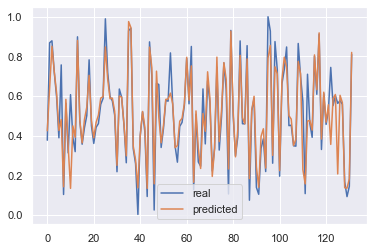

In [83]:
plt.plot(y_test, label = 'real') 
plt.plot(yhat, label = 'predicted') 
plt.legend() 
plt.show() 

In [84]:
batchsize = [10,40,100]
optimizer = ['adam','sgd']

In [85]:
# Utiliser scikit-learn pour grid search 
import numpy 
from sklearn.model_selection import GridSearchCV 
from keras.models import Sequential 
from keras.layers import Dense 
from scikeras.wrappers import KerasRegressor #KerasClassifier # Permet d'utiliser les modèles de Keras avec Scikit-Learn
# Nombre d'attributs
n_features = X.shape[1] 
def create_model(hidden_layer_dim=10, activation='relu'): 
     # creer le model
     model = Sequential() 
     model.add(Dense(hidden_layer_dim, input_dim=n_features, kernel_initializer='he_normal', activation=activation)) 
     model.add(Dense(1, activation= activation)) 
     return model 
# load dataset
# Diviser le dataset en entrée (X) et sortie (y) 
X,y = df.values[:,:-1], df.values[:,-1] 
# Creer le model
model = KerasRegressor(create_model, loss='mse', verbose=0, hidden_layer_dim = 10, activation= 'relu') 
# definir les hyper-paramètres de grid search
param_grid = { 
'batch_size': batchsize, 
'optimizer': optimizer, 
'activation': ['relu','elu'] 
} 
grid = GridSearchCV(model, param_grid, n_jobs=-
1, cv=5, scoring = 'neg_mean_absolute_error') 
grid.fit(X, y)

GridSearchCV(cv=5,
             estimator=KerasRegressor(activation='relu', hidden_layer_dim=10, loss='mse', model=<function create_model at 0x000001B78F7F8160>, verbose=0),
             n_jobs=-1,
             param_grid={'activation': ['relu', 'elu'],
                         'batch_size': [10, 40, 100],
                         'optimizer': ['adam', 'sgd']},
             scoring='neg_mean_absolute_error')

In [86]:
# Afficher les resultats
print("Best score: %f using %s" % (grid.best_score_, grid.best_params_)) 
means = grid.cv_results_['mean_test_score'] 
stds = grid.cv_results_['std_test_score'] 
params = grid.cv_results_['params'] 
for mean, param in zip(means, params): 
 print("%f with: %r" % (mean, param)) 
print(grid.best_estimator_) 

Best score: -0.166102 using {'activation': 'elu', 'batch_size': 10, 'optimizer': 'sgd'}
-0.308658 with: {'activation': 'relu', 'batch_size': 10, 'optimizer': 'adam'}
-0.261668 with: {'activation': 'relu', 'batch_size': 10, 'optimizer': 'sgd'}
-0.479411 with: {'activation': 'relu', 'batch_size': 40, 'optimizer': 'adam'}
-0.341510 with: {'activation': 'relu', 'batch_size': 40, 'optimizer': 'sgd'}
-0.455983 with: {'activation': 'relu', 'batch_size': 100, 'optimizer': 'adam'}
-0.407141 with: {'activation': 'relu', 'batch_size': 100, 'optimizer': 'sgd'}
-0.320756 with: {'activation': 'elu', 'batch_size': 10, 'optimizer': 'adam'}
-0.166102 with: {'activation': 'elu', 'batch_size': 10, 'optimizer': 'sgd'}
-0.515235 with: {'activation': 'elu', 'batch_size': 40, 'optimizer': 'adam'}
-0.466251 with: {'activation': 'elu', 'batch_size': 40, 'optimizer': 'sgd'}
-0.591060 with: {'activation': 'elu', 'batch_size': 100, 'optimizer': 'adam'}
-0.476477 with: {'activation': 'elu', 'batch_size': 100, 'opt

In [87]:
grid_model = KerasRegressor(
create_model,
build_fn=None,
warm_start=False,
random_state=None,
optimizer="sgd",
loss="mse",
metrics=None,
batch_size=10,
validation_batch_size=None,
verbose=0,
callbacks=None,
validation_split=0.0,
shuffle=True,
run_eagerly=False,
epochs=1,
hidden_layer_dim=10,
activation="elu"
)

In [88]:
history = grid_model.fit(X_train, y_train, epochs = 120 , batch_size = 10 , verbose = 0,validation_data=(X_test, y_test))

In [90]:
#prédire test set
yhat = grid_model.predict(X_test)
#évaluer les predictions
mae_s = metrics.mean_absolute_error(y_test, yhat)
mse_s = metrics.mean_squared_error(y_test, yhat)
rmse = np.sqrt(metrics.mean_squared_error(y_test, yhat))
r2 = metrics.r2_score(y_test, yhat)
print('MAE : %.3f' %mae_s)
print('MSE : %.3f' %mse_s)
print('RMSE : %.3f' %rmse)
print('R2 : %.3f' %r2)

MAE : 0.060
MSE : 0.010
RMSE : 0.099
R2 : 0.824


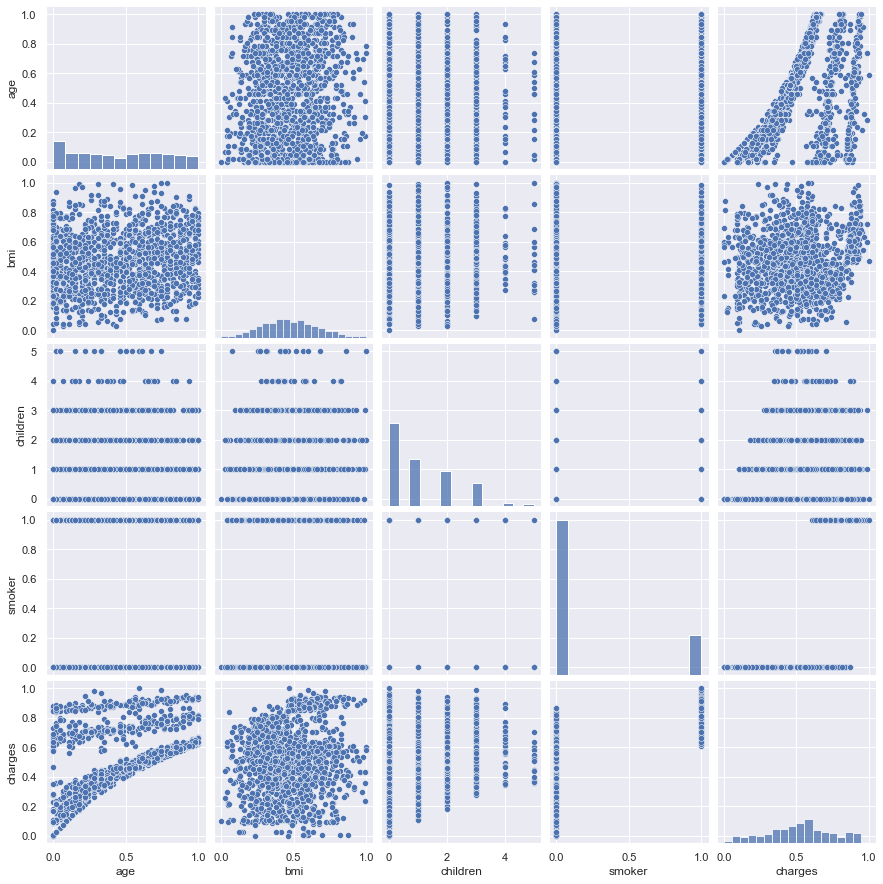

In [38]:
sns.pairplot(df)

In [39]:
df.head()

,age,bmi,children,smoker,charges
0,0.021739,0.387788,0,1.0,0.674206
1,0.000000,0.578435,1,0.0,0.107057
2,0.217391,0.553426,3,0.0,0.342591
3,0.326087,0.219065,0,0.0,0.739829
4,0.304348,0.419617,0,0.0,0.307695


In [40]:
Y=df["charges"]

X=df[["age", 'bmi','children','smoker']]


In [41]:
#Split data into training and testing 
 
    
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)


In [42]:
X = sm.add_constant(X_train)
model = sm.OLS(y_train, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     747.3
Date:                Tue, 26 Apr 2022   Prob (F-statistic):          6.26e-288
Time:                        01:47:42   Log-Likelihood:                 735.74
No. Observations:                 930   AIC:                            -1461.
Df Residuals:                     925   BIC:                            -1437.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1783      0.011     16.307      0.0

C:\Users\Mohcine\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [43]:
y_test.shape

(399,)

In [44]:
X_test

,age,bmi,children,smoker
1136,0.565217,0.293602,1,0.0
404,0.282609,0.144203,0,0.0
1292,0.065217,0.235466,0,0.0
379,0.956522,0.503410,1,0.0
960,0.021739,0.768269,1,0.0
...,...,...,...,...
166,0.043478,0.683339,5,0.0
23,0.347826,0.518350,1,1.0
1276,0.086957,0.468983,0,0.0
776,0.478261,0.530692,2,0.0


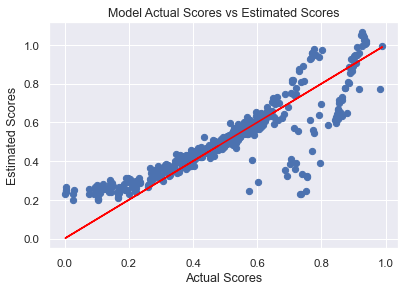

In [49]:
X_test = sm.add_constant(X_test)
predictions = results.predict(X_test)
plt.figure(dpi = 75)
plt.scatter(y_test, predictions)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Scores")
plt.ylabel("Estimated Scores")
plt.title("Model Actual Scores vs Estimated Scores")
plt.show()

In [50]:
print("Mean Absolute Error (MAE) : " ,metrics.mean_absolute_error(y_test, predictions))
print("Mean Squared Error (MSE) : " ,metrics.mean_squared_error(y_test, predictions))
print("Root Mean Squared Error (RMSE) : " ,np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error (MAE) :  0.07341771102184982
Mean Squared Error (MSE) :  0.013323232788342987
Root Mean Squared Error (RMSE) :  0.11542630890894409
